In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
import numpy as np
import matplotlib.pyplot as plt
from pyabc.plots import plot_marginals
%matplotlib inline

In [2]:
prior_lambda = pyabc.Prior('gamma', 0.1, 0, 1/0.1, name=r'$\lambda$') 
 
def simulator(ld): 
    return np.random.exponential(ld, 30) 

def summary_mean(X): 
    return np.mean(X) 

In [3]:
#observation 
# Set the generating parameters that we will try to infer 
ld0 = 0.1

# Generate some data (using a fixed seed here) 
np.random.seed(20170525) 
y0 = simulator(ld0) 

In [15]:
rej = pyabc.RejectionSampler(priors = [prior_lambda], simulator = simulator, observation = y0, summaries = [summary_mean])
mcmc = pyabc.MCMCSampler(priors = [prior_lambda], simulator = simulator, observation = y0, summaries = [summary_mean])
smc = pyabc.SMCSampler(priors = [prior_lambda], simulator = simulator, observation = y0, summaries = [summary_mean])
abcde = pyabc.ABCDESampler(priors = [prior_lambda], simulator = simulator, observation = y0, summaries = [summary_mean])
bolfi = pyabc.BOLFI(priors = [prior_lambda], simulator = simulator, observation = y0, summaries = [summary_mean], domain = [(0,1)])

In [16]:
rej.sample(threshold = 0.01, nr_samples = 500)

Rejection sampler started with threshold: 0.01 and number of samples: 500
Samples:    500 - Threshold: 0.0100 - Iterations:      33000 - Acceptance rate: 0.015152 - Time:     1.16 s


In [17]:
mcmc.sample(threshold = 0.01, nr_samples = 500, step_size = [0.05])

MCMC sampler started with threshold: 0.01 and number of samples: 500
Samples:    500 - Threshold: 0.0100 - Iterations:       3070 - Acceptance rate: 0.162866 - Time:     1.12 s


In [18]:
smc.sample(thresholds = [0.1,0.05,0.01], nr_samples = 500)

SMC sampler started with thresholds: [0.1, 0.05, 0.01] and number of samples: 500
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
starting iteration[ 2 ]
Iteration 2 completed
Samples:    500 - Thresholds: 0.01 - Iterations:       6222 - Acceptance rate: 0.080360 - Time:     3.08 s


In [24]:
abcde.sample(nr_samples=500, nr_groups = 10, nr_iter = 10, burn_in = 5, alpha = 0.0, beta = 0.0, kappa = 0.9)

ABC-Differential-Evolution sampler started with number of samples: 500
initializing pools
Samples:    500 - Iterations:         10 - Acceptance rate: None - Time:     7.08 s


In [20]:
bolfi.sample(nr_samples=500, threshold=0.01, n_chains=10)

BOLFI sampler started with threshold: 0.01 and number of samples: 500
Starting Bayesian Optimization
Starting MCMC sampling with approximative likelihood
Samples:    500 - Threshold: keiner - Iterations:        510 - Acceptance rate: 0.356863 - Time:    17.60 s


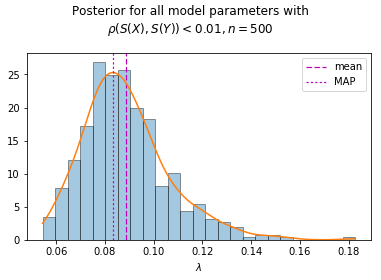

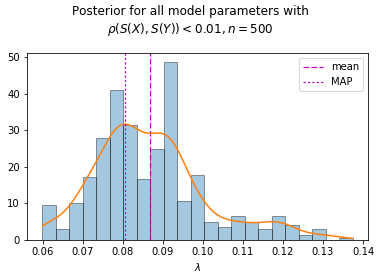

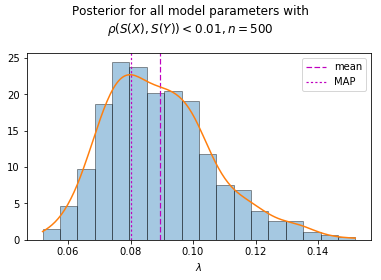

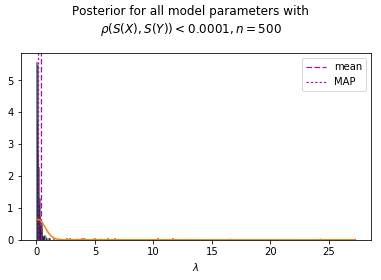

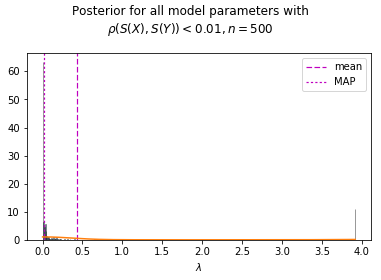

In [25]:
plot_marginals(rej)
plot_marginals(mcmc)
plot_marginals(smc)
plot_marginals(abcde)
plot_marginals(bolfi)